<a href="https://colab.research.google.com/github/ass007-mouele/python/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below
This is a dataset with car models, and continents where cars are producted.

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.externals.six import StringIO

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv"
df_cars = pd.read_csv(link)
df_cars = df_cars.loc[df_cars['continent'].isin([' US.', ' Europe.'])]
df_cars.reset_index(drop = True, inplace = True)
df_cars

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,continent
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
205,23.5,6,173,110,2725,13,1982,US.
206,17.0,8,305,130,3840,15,1980,US.
207,22.0,6,232,112,2835,15,1983,US.
208,18.0,6,232,100,3288,16,1972,US.


# Pairplot and heatmap
- Draw a pairplot with different color by continent
- Draw a correlation heatmap

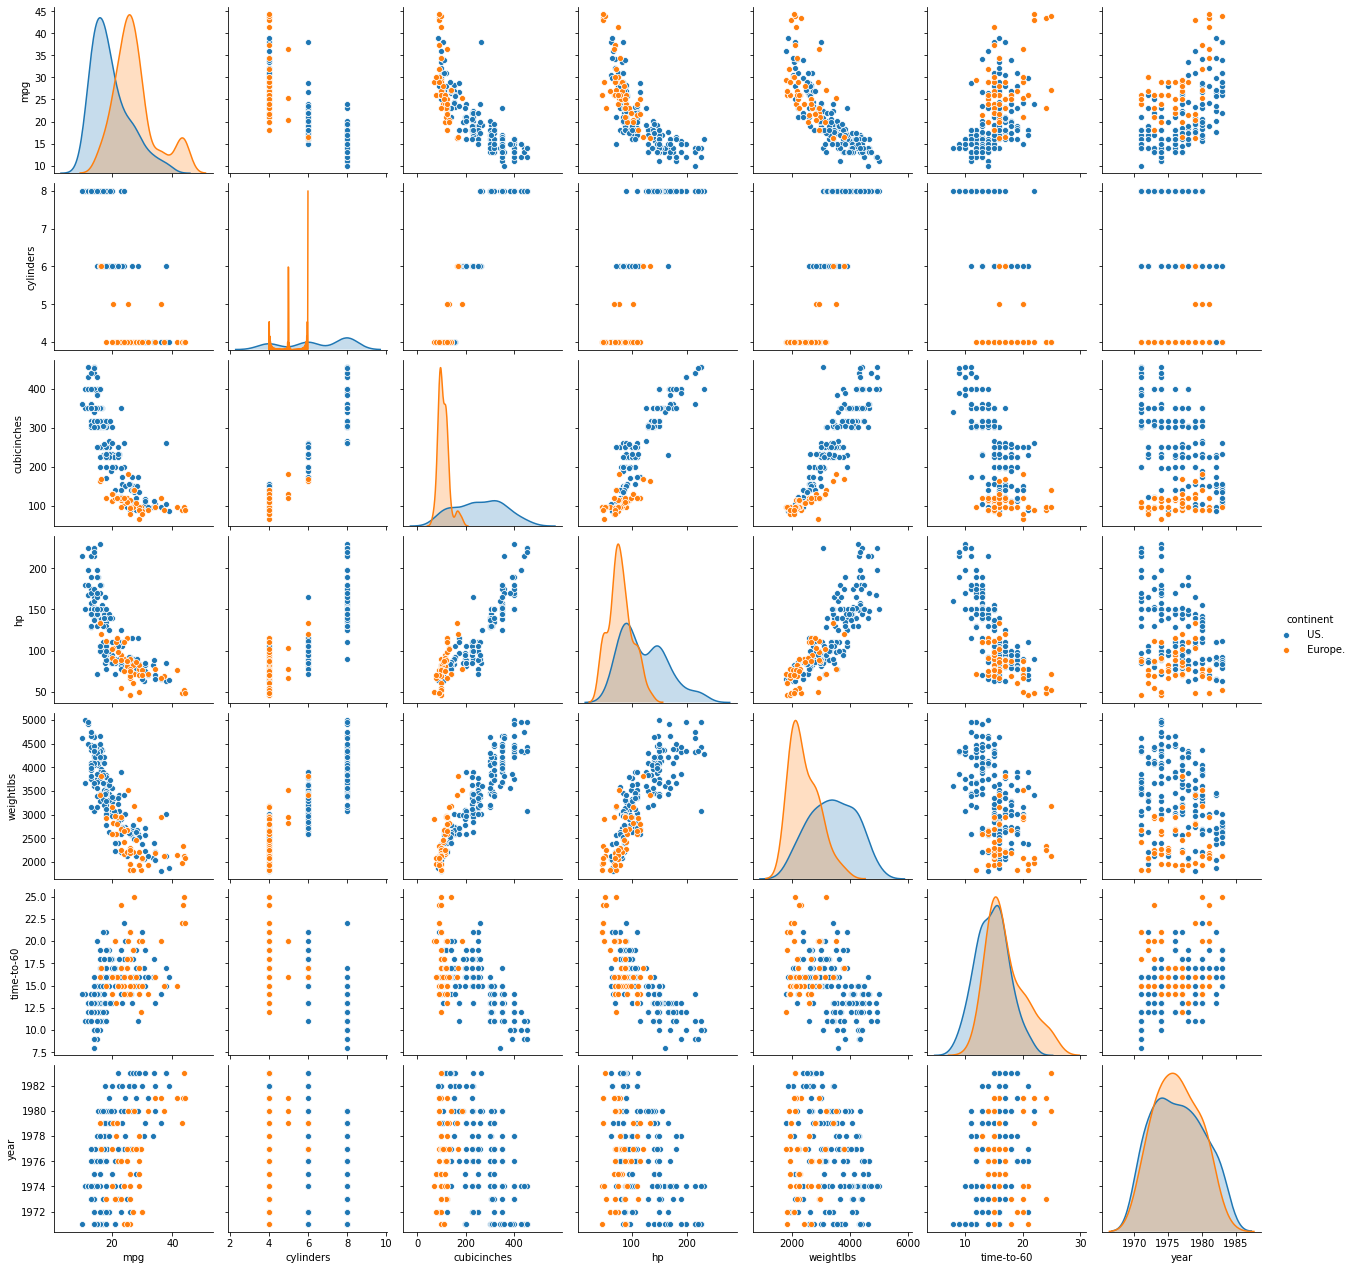

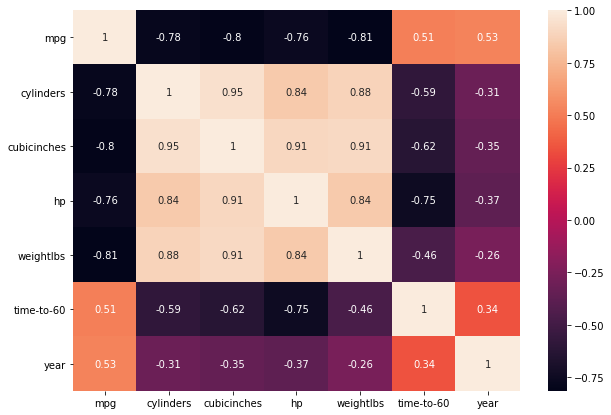

In [103]:
# Your code here :
df_correlated=df_cars.corr()
sns.pairplot(df_cars,hue="continent")
plt.figure(figsize=(10,7))
sns.heatmap(df_correlated, annot=True)
plt.show()


# Decision Tree
Let's select the numeric columns as variables and the category Continent as target

In [0]:
# Your code here :
X = df_cars[["mpg","cylinders","cubicinches","hp","weightlbs","time-to-60","year"]]
y = df_cars['continent']


## Split the dataset and train the model

First, you have to train-test split the dataset.

Then, you'll train your model on the train set with the DecisionTreeClassifier from scikit-learn. 

In [105]:
# Your code here :

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.75, random_state=1)

# Train Decision Tree Classifer
modelclf = DecisionTreeClassifier().fit(X_train,y_train)

#Predict the response for test dataset
modelclf.predict(X_test)

array([' Europe.', ' US.', ' US.', ' US.', ' Europe.', ' US.', ' US.',
       ' US.', ' US.', ' US.', ' US.', ' US.', ' US.', ' US.', ' US.',
       ' US.', ' US.', ' US.', ' US.', ' Europe.', ' US.', ' US.', ' US.',
       ' Europe.', ' Europe.', ' US.', ' US.', ' US.', ' US.', ' US.',
       ' US.', ' Europe.', ' US.', ' US.', ' Europe.', ' Europe.',
       ' Europe.', ' US.', ' US.', ' US.', ' Europe.', ' US.', ' US.',
       ' US.', ' US.', ' Europe.', ' US.', ' US.', ' Europe.', ' US.',
       ' US.', ' Europe.', ' US.'], dtype=object)

## Score and Confusion matrix
- What is the accuracy score and confusion matrix of our model on the **train** set ?
- What is the accuracy score and confusion matrix of our model on the **test** set ?

Maybe our model is overfitted...

In [106]:
# Your code here :
print("accuracy score and confusion matrix of our model on the train set is \n")
print(accuracy_score(y_train, modelclf.predict(X_train)))
print(confusion_matrix(y_train, modelclf.predict(X_train)))
print("accuracy score and confusion matrix of our model on the test set is \n")
print(accuracy_score(y_test, modelclf.predict(X_test)))
print(confusion_matrix(y_test, modelclf.predict(X_test)))


accuracy score and confusion matrix of our model on the train set is 

1.0
[[ 37   0]
 [  0 120]]
accuracy score and confusion matrix of our model on the test set is 

0.9245283018867925
[[10  1]
 [ 3 39]]


## Display the Decision Tree 

In [107]:
# Just change the name with your model name to see the decision tree
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus

DT_data = export_graphviz(modelclf)  # Change with your model here
print(DT_data)

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 133.0\ngini = 0.36\nsamples = 157\nvalue = [37, 120]"] ;
1 [label="X[6] <= 1981.5\ngini = 0.44\nsamples = 52\nvalue = [35, 17]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[4] <= 2260.0\ngini = 0.351\nsamples = 44\nvalue = [34, 10]"] ;
1 -> 2 ;
3 [label="X[2] <= 97.5\ngini = 0.459\nsamples = 28\nvalue = [18, 10]"] ;
2 -> 3 ;
4 [label="X[3] <= 69.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 8\nvalue = [8, 0]"] ;
4 -> 5 ;
6 [label="X[0] <= 28.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]"] ;
4 -> 6 ;
7 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
6 -> 8 ;
9 [label="X[4] <= 2135.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]"] ;
3 -> 9 ;
10 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
9 -> 10 ;
11 [label="X[3] <= 84.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]"] ;
9 -> 11 ;
12 [label="X[5

### It's not very readable...
Let's try with this

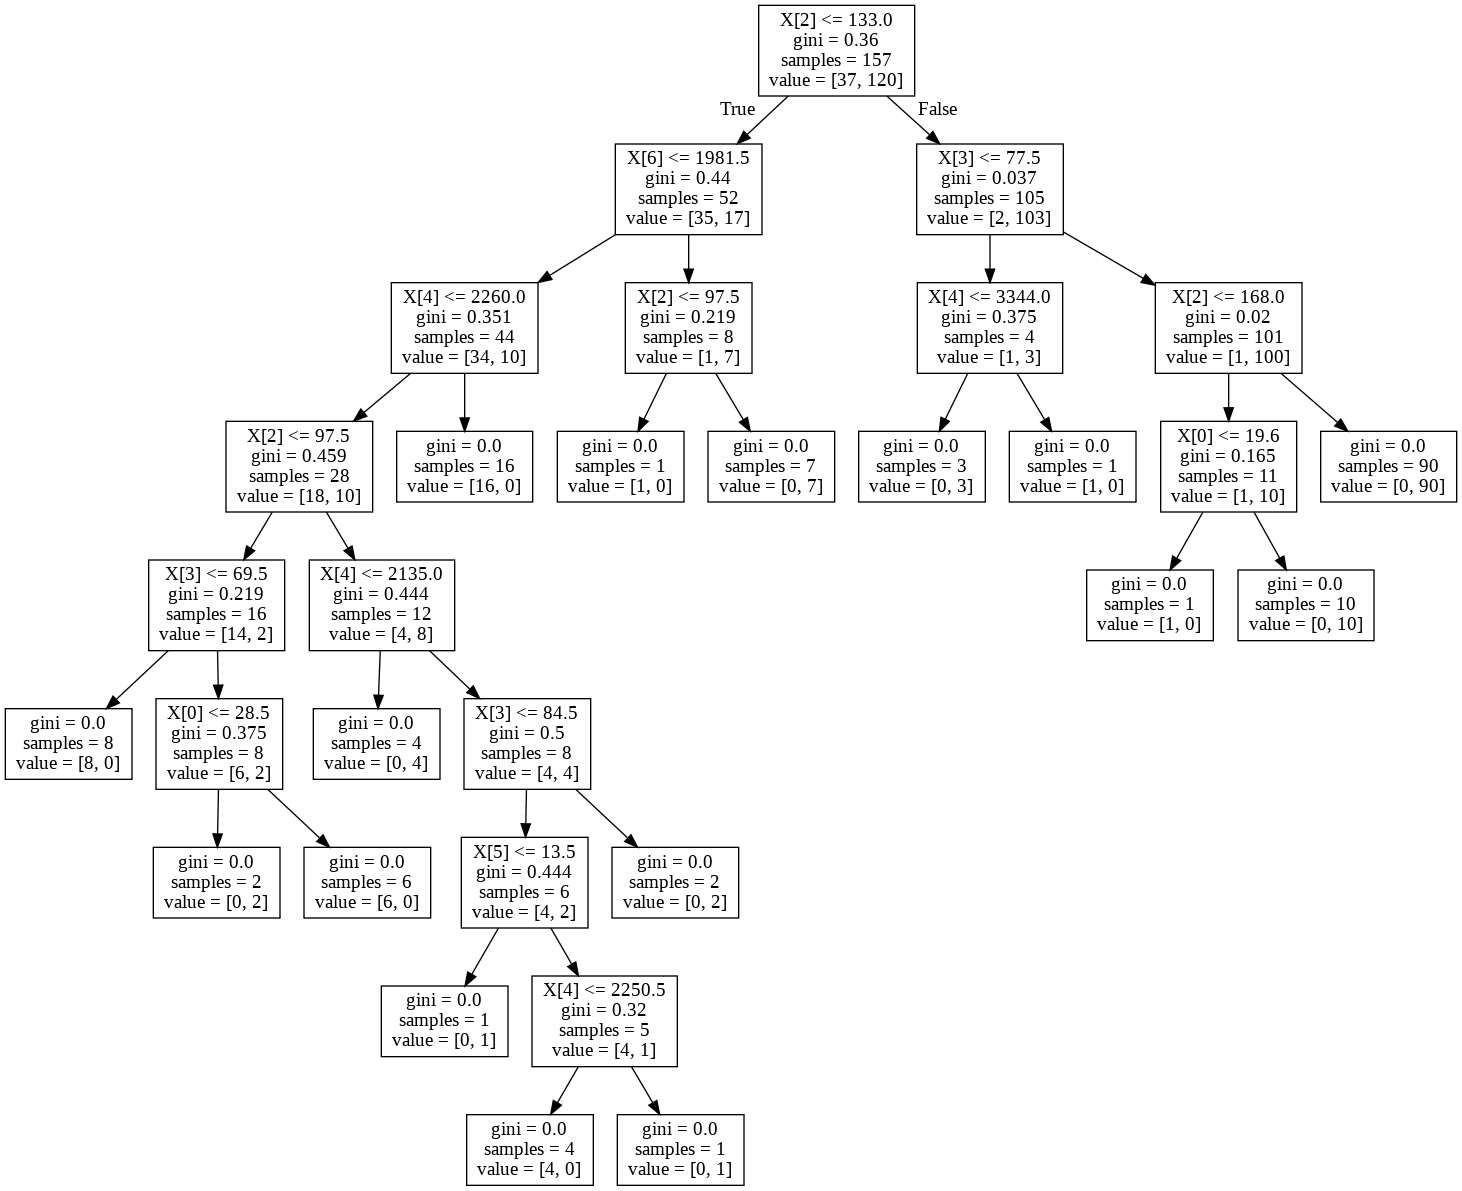

In [108]:
# Execute the code below :
from IPython.display import display, Image

graph = pydotplus.graph_from_dot_data(DT_data)
graph.write_png('tree.png')
display(Image(filename='tree.png'))

### It's better, but we can do better and better !
Try to play with the arguments of the export_graphviz function to be more readable. Especially : filled, rounded, class_names and feature_names.

Your goal is to get a readable decision tree with :
- US cars in one color and European cars in another
- readable class names and feature names

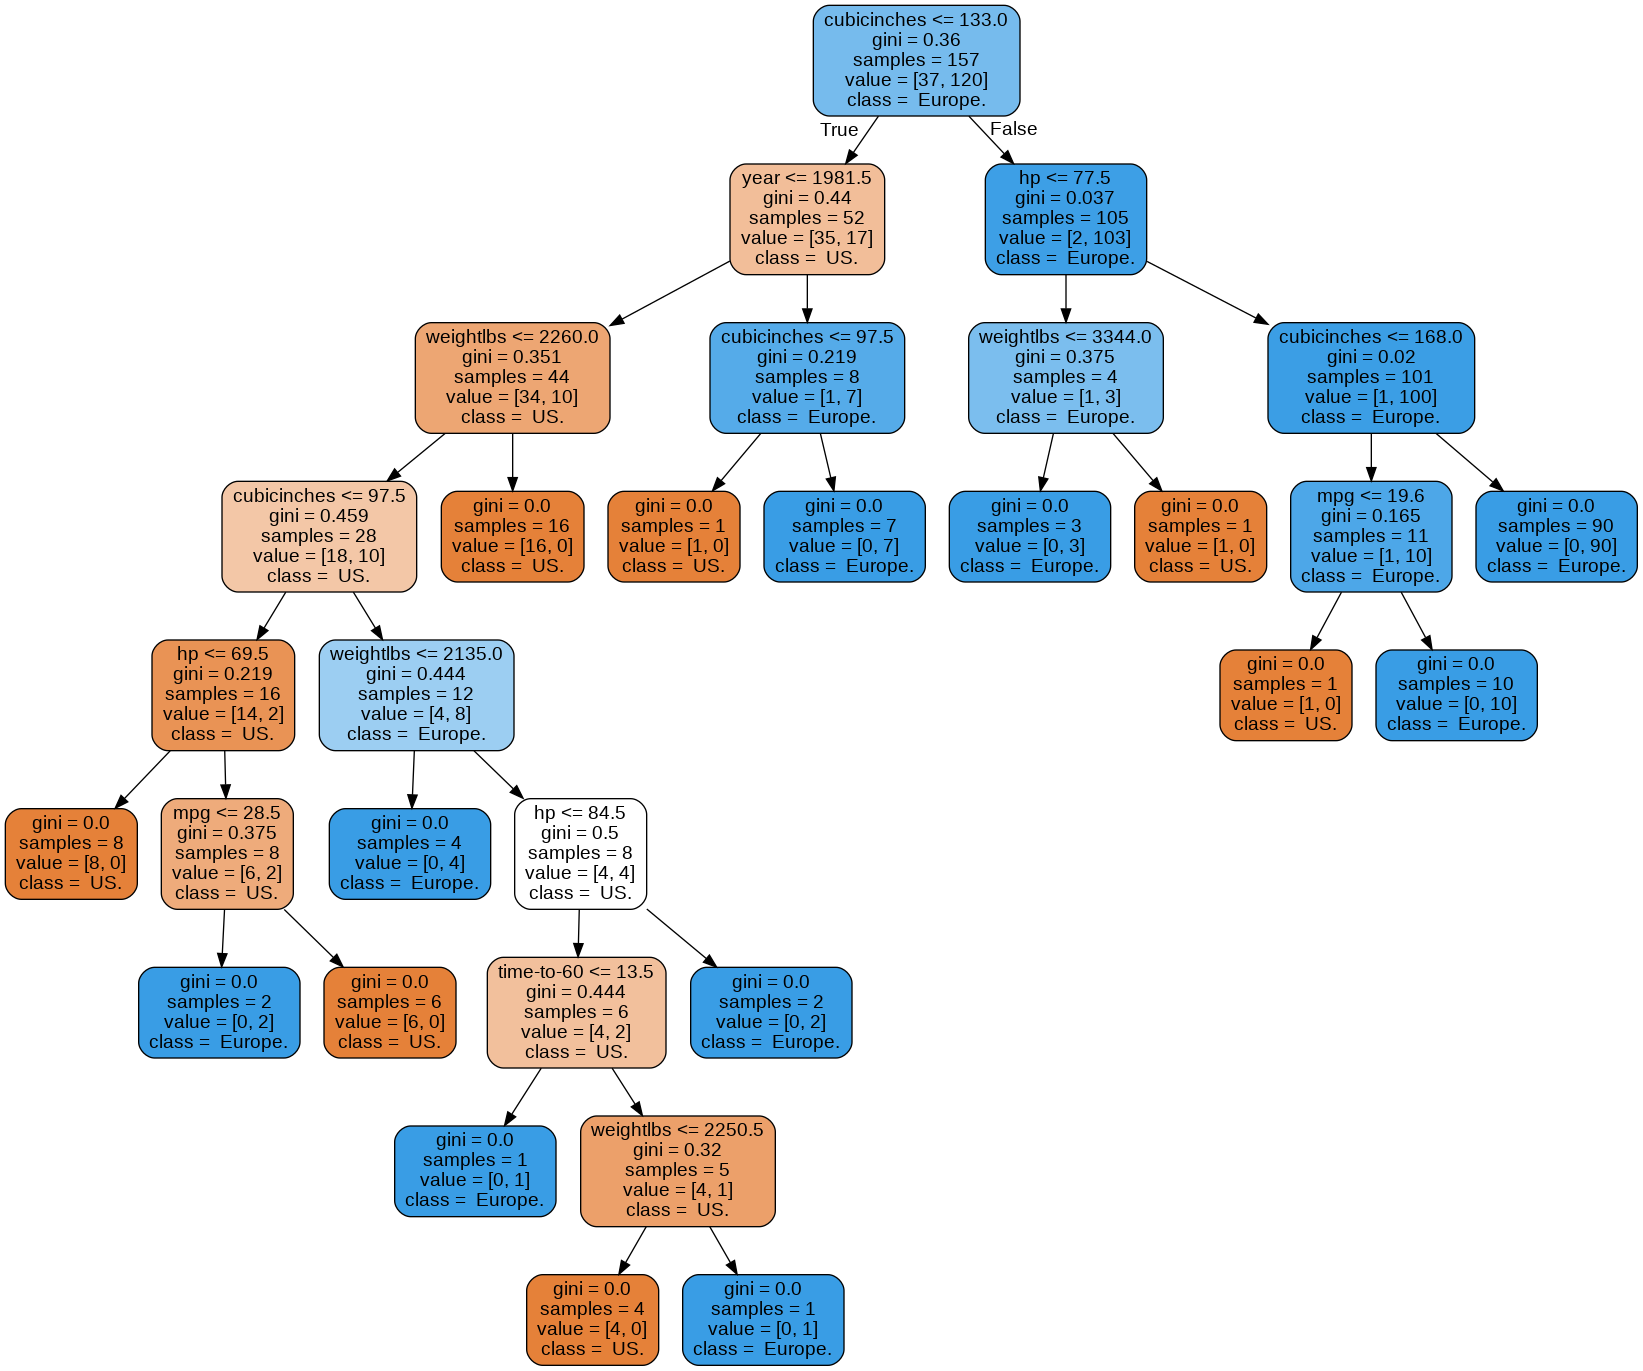

In [109]:

# Your code here :
feature_cols=["mpg","cylinders","cubicinches","hp","weightlbs","time-to-60","year"]

DT_data1=export_graphviz(modelclf,
                filled=True, rounded=True,
                feature_names =feature_cols,class_names=y)

graph = pydotplus.graph_from_dot_data(DT_data1)
graph.write_png('tree.png')
display(Image(filename='tree.png'))


## Overfitting
Try to reduce overfitting (ie increase the test accuracy score and probably decrease the train accuracy score).

You can try to change the max_depth argument in the Decision Tree classifier.

Print your best test score, the confusion matrix and the decision tree.

In [114]:
# Your code here :


modelclf = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)

print("accuracy score of our model on the train set is \n")

print(accuracy_score(y_train, modelclf.predict(X_train)))
print(confusion_matrix(y_train, modelclf.predict(X_train)))

print("accuracy score of our model on the test set is \n")

print(accuracy_score(y_test, modelclf.predict(X_test)))
print(confusion_matrix(y_test, modelclf.predict(X_test)))


accuracy score of our model on the train set is 

0.9617834394904459
[[ 37   0]
 [  6 114]]
accuracy score of our model on the test set is 

0.9622641509433962
[[11  0]
 [ 2 40]]


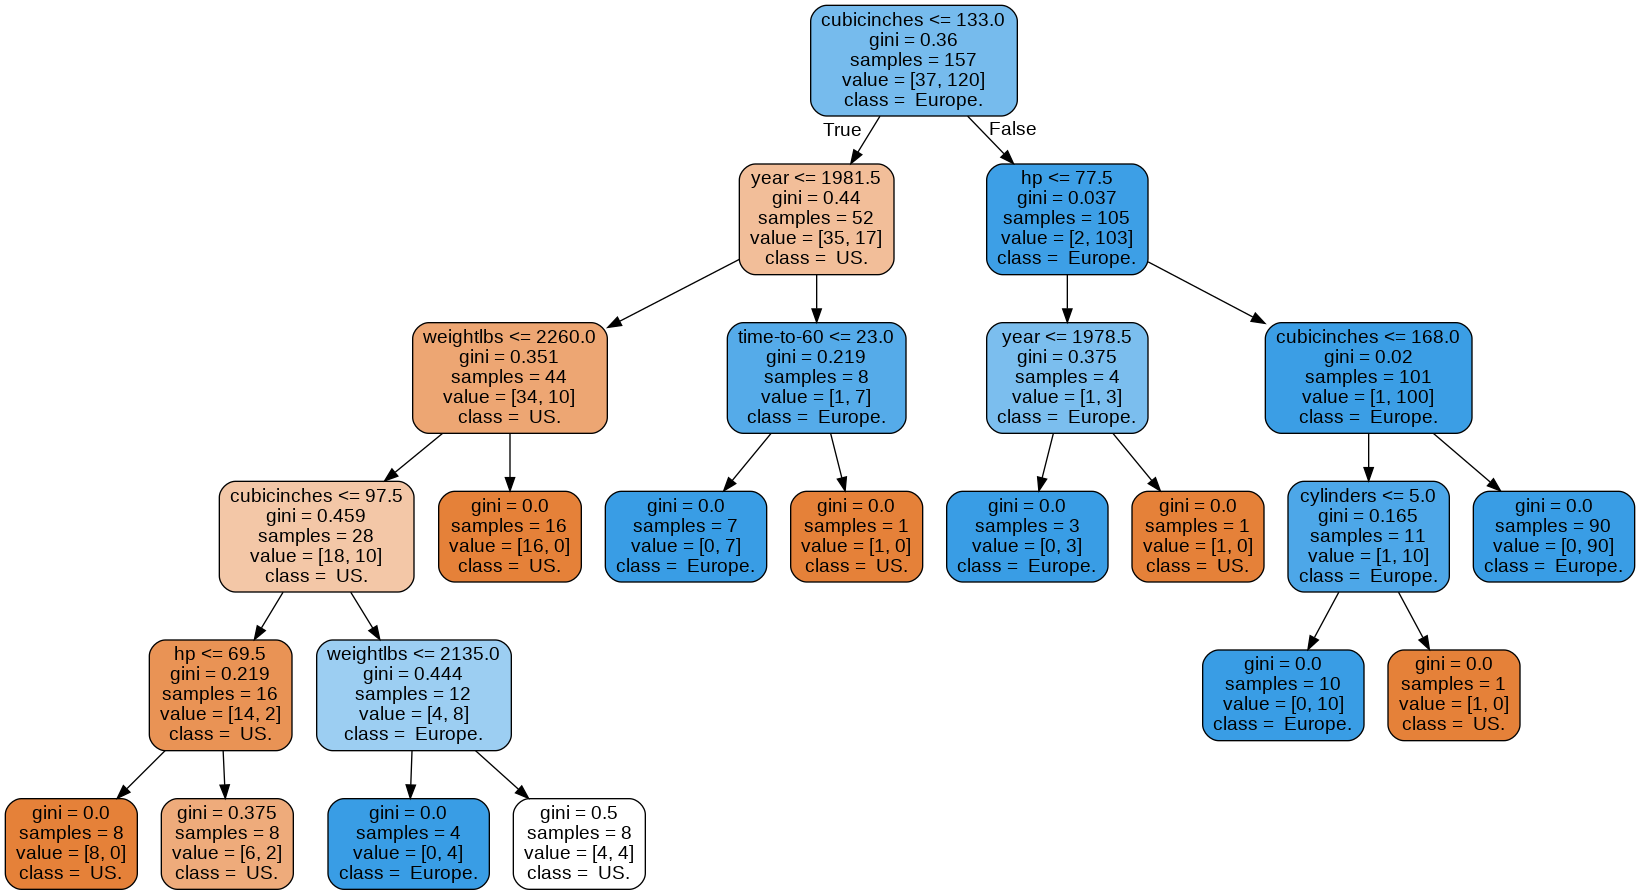

In [115]:
feature_cols=["mpg","cylinders","cubicinches","hp","weightlbs","time-to-60","year"]

DT_data1=export_graphviz(modelclf,
                filled=True, rounded=True,
                feature_names =feature_cols,class_names=y)

graph = pydotplus.graph_from_dot_data(DT_data1)
graph.write_png('tree.png')
display(Image(filename='tree.png'))